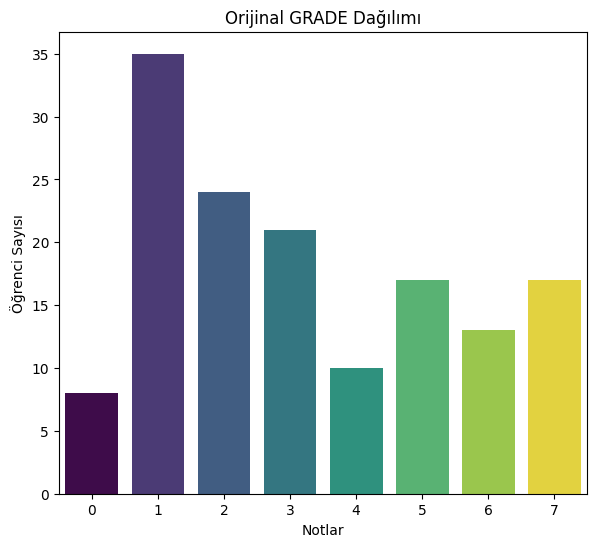

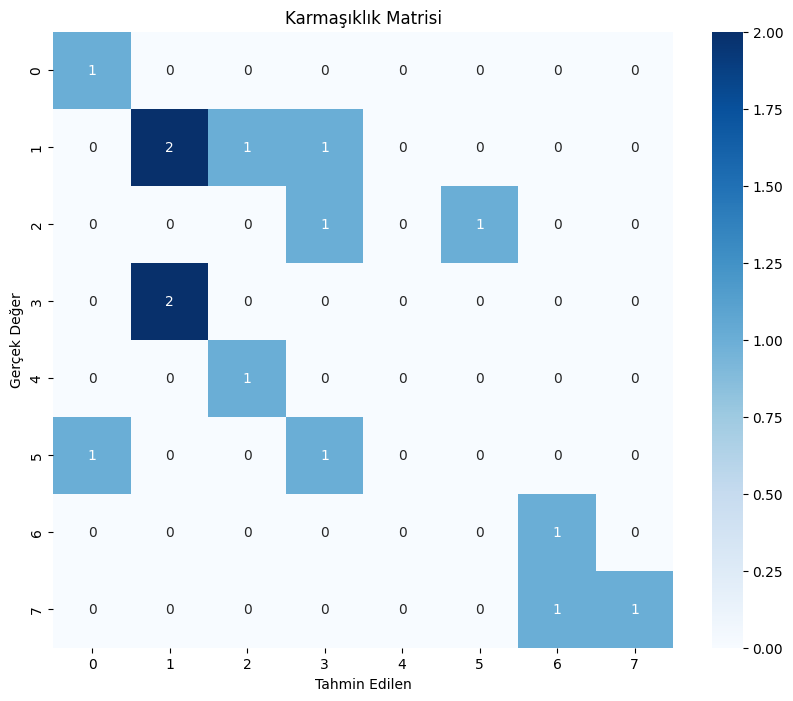

Accuracy: 0.3333333333333333
Precision (macro): 0.3125
Recall (macro): 0.375
F1 Score (macro): 0.3125
Detaylı Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.50      0.50      0.50         4
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       0.50      1.00      0.67         1
           7       1.00      0.50      0.67         2

    accuracy                           0.33        15
   macro avg       0.31      0.38      0.31        15
weighted avg       0.33      0.33      0.31        15



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

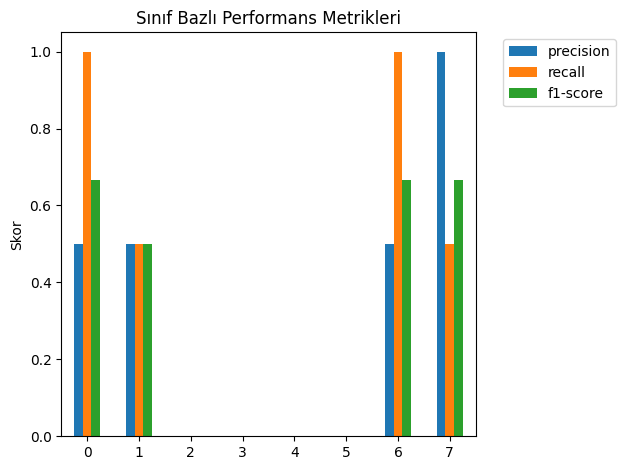

In [4]:
# 0.3333 SMOTE'suz KNN
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

df = pd.read_csv('DATA.csv')

X = df.drop(['GRADE', 'STUDENT ID'], axis=1, errors='ignore')
y = df['GRADE']

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.countplot(x=y, hue=y, palette='viridis', legend=False)
plt.title('Orijinal GRADE Dağılımı')
plt.xlabel('Notlar')
plt.ylabel('Öğrenci Sayısı')

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.1,
                                                    random_state=42,
                                                    stratify=y)

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(y.unique()),
            yticklabels=sorted(y.unique()))
plt.title('Karmaşıklık Matrisi')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek Değer')
plt.show()

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))

print("Detaylı Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred, zero_division=0))

report = classification_report(y_test, y_pred, output_dict=True)
metrics_df = pd.DataFrame(report).transpose().drop(['accuracy', 'macro avg', 'weighted avg'], errors='ignore')

metrics_df[['precision', 'recall', 'f1-score']].plot(kind='bar')
plt.title('Sınıf Bazlı Performans Metrikleri')
plt.ylabel('Skor')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

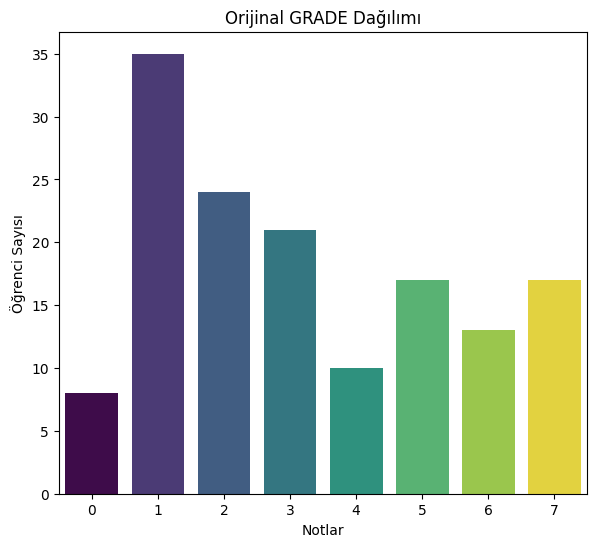

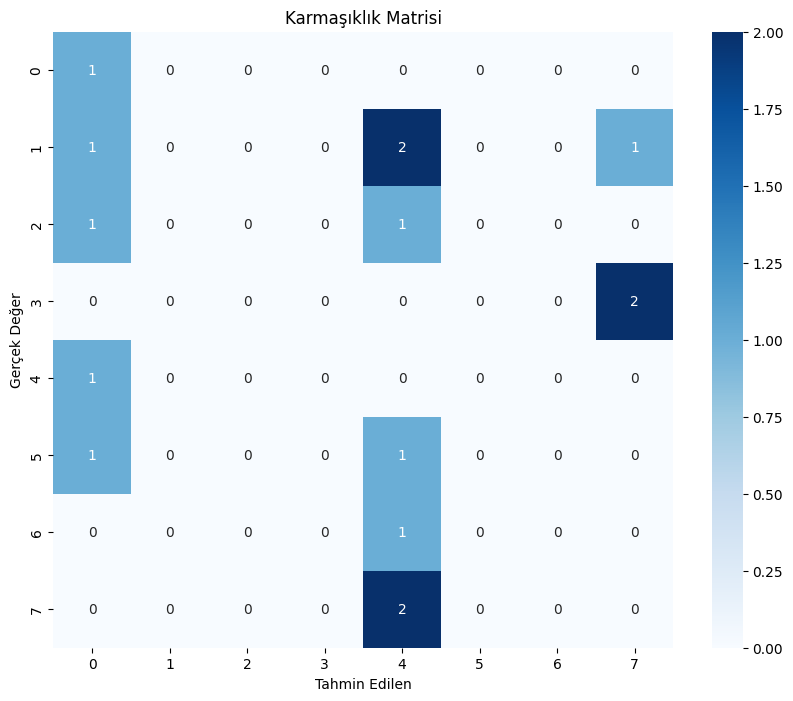

Accuracy: 0.06666666666666667
Precision (macro): 0.025
Recall (macro): 0.125
F1 Score (macro): 0.041666666666666664
Detaylı Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.20      1.00      0.33         1
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         2

    accuracy                           0.07        15
   macro avg       0.03      0.12      0.04        15
weighted avg       0.01      0.07      0.02        15



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

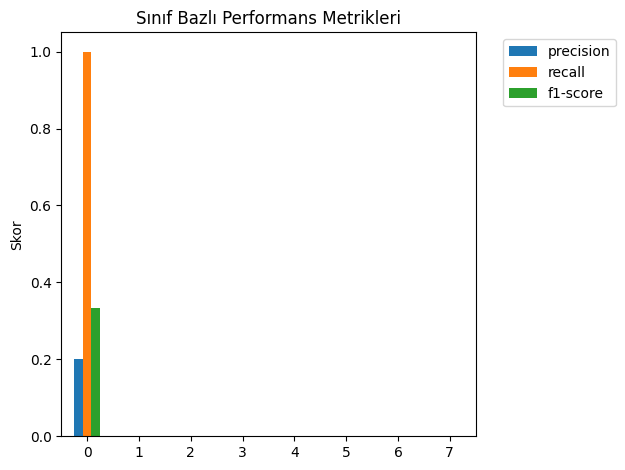

In [3]:
# 0.0666 SMOTE'suz Naive Bayes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

df = pd.read_csv('DATA.csv')

X = df.drop(['GRADE', 'STUDENT ID'], axis=1, errors='ignore')
y = df['GRADE']

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.countplot(x=y, hue=y, palette='viridis', legend=False)
plt.title('Orijinal GRADE Dağılımı')
plt.xlabel('Notlar')
plt.ylabel('Öğrenci Sayısı')


X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.1,
                                                    random_state=42,
                                                    stratify=y)

model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(y.unique()),
            yticklabels=sorted(y.unique()))
plt.title('Karmaşıklık Matrisi')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek Değer')
plt.show()

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))

print("Detaylı Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred, zero_division=0))

report = classification_report(y_test, y_pred, output_dict=True)
metrics_df = pd.DataFrame(report).transpose().drop(['accuracy', 'macro avg', 'weighted avg'], errors='ignore')

metrics_df[['precision', 'recall', 'f1-score']].plot(kind='bar')
plt.title('Sınıf Bazlı Performans Metrikleri')
plt.ylabel('Skor')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

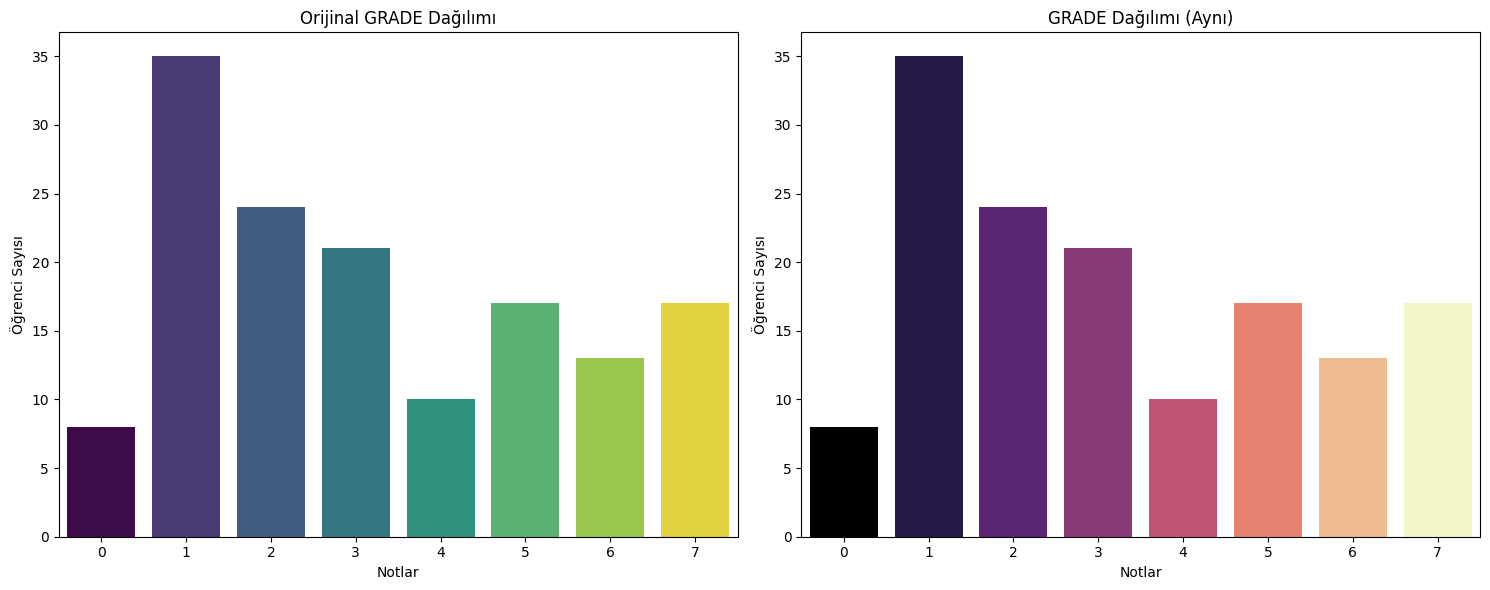

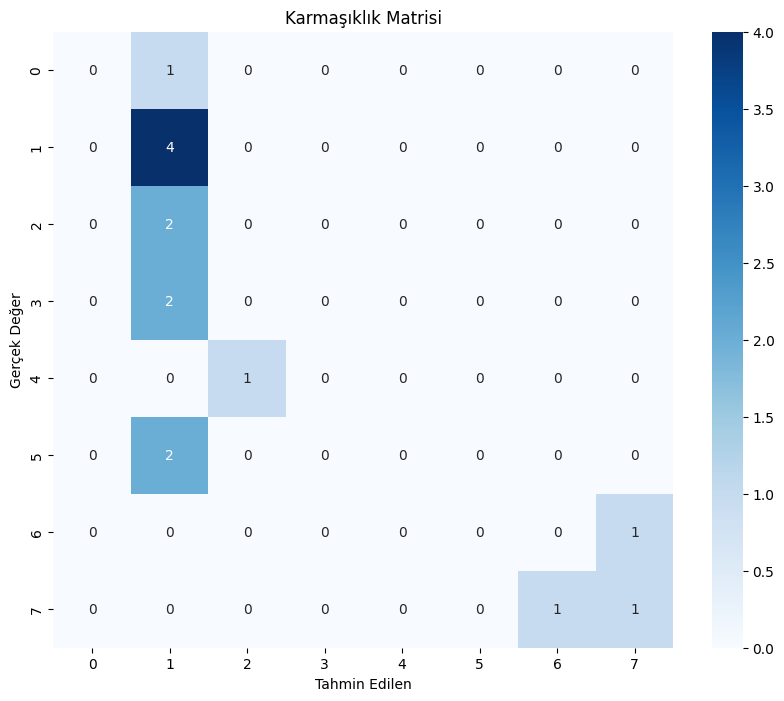

Accuracy: 0.3333333333333333
Precision (macro): 0.10795454545454546
Recall (macro): 0.1875
F1 Score (macro): 0.12916666666666665
Detaylı Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.36      1.00      0.53         4
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         1
           7       0.50      0.50      0.50         2

    accuracy                           0.33        15
   macro avg       0.11      0.19      0.13        15
weighted avg       0.16      0.33      0.21        15



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

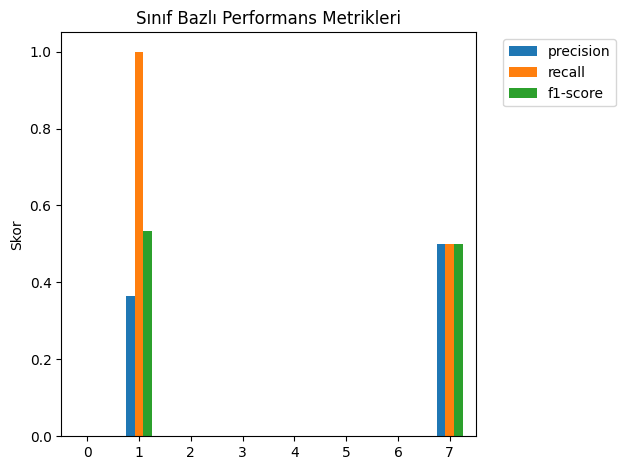

In [ ]:
# 0.3333 SMOTE'suz SVM
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

df = pd.read_csv('DATA.csv')

X = df.drop(['GRADE', 'STUDENT ID'], axis=1, errors='ignore')
y = df['GRADE']

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.countplot(x=y, hue=y, palette='viridis', legend=False)
plt.title('Orijinal GRADE Dağılımı')
plt.xlabel('Notlar')
plt.ylabel('Öğrenci Sayısı')

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.1,
                                                    random_state=42,
                                                    stratify=y)

model = SVC(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(y.unique()),
            yticklabels=sorted(y.unique()))
plt.title('Karmaşıklık Matrisi')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek Değer')
plt.show()

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))

print("Detaylı Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred, zero_division=0))

report = classification_report(y_test, y_pred, output_dict=True)
metrics_df = pd.DataFrame(report).transpose().drop(['accuracy', 'macro avg', 'weighted avg'], errors='ignore')

metrics_df[['precision', 'recall', 'f1-score']].plot(kind='bar')
plt.title('Sınıf Bazlı Performans Metrikleri')
plt.ylabel('Skor')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

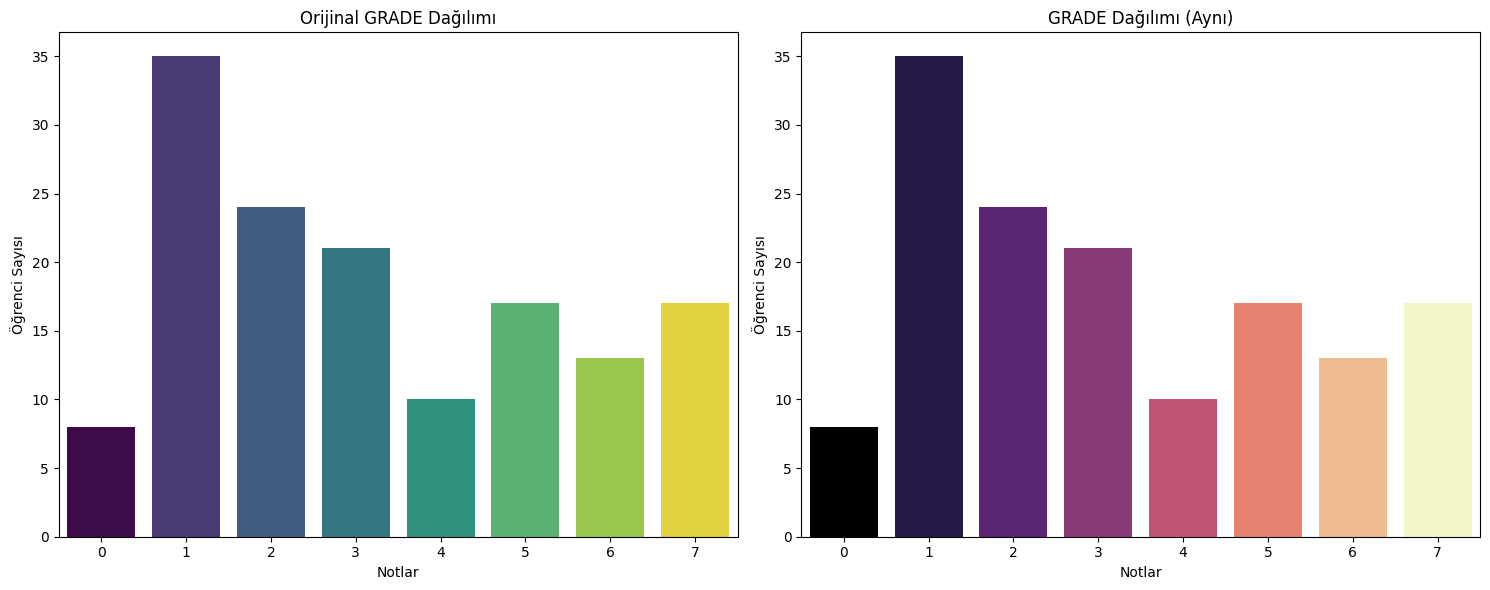

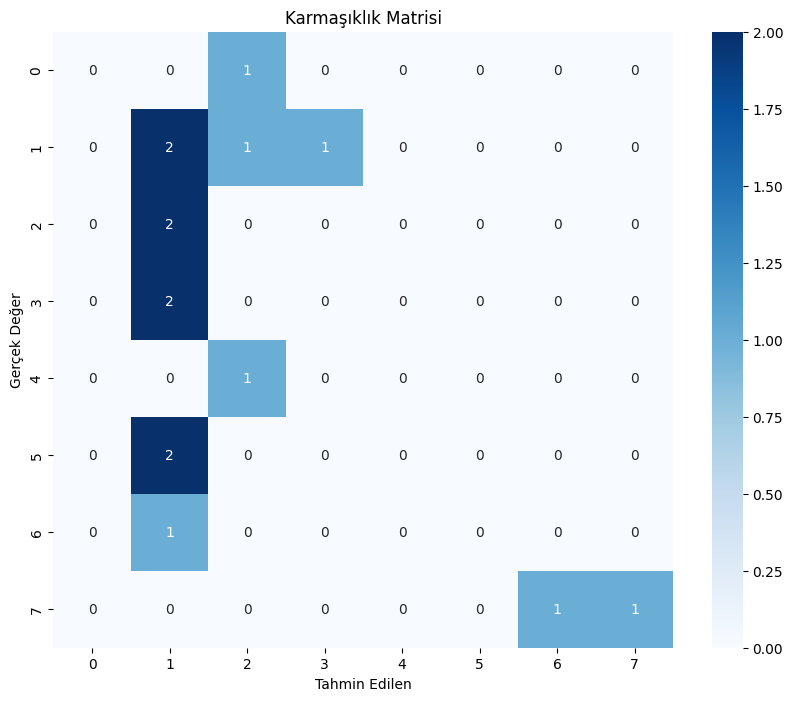

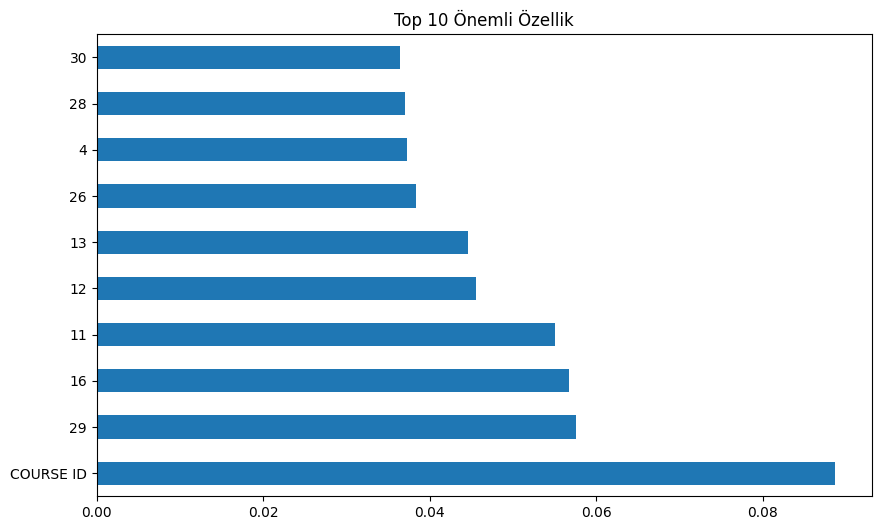

Accuracy: 0.2
Precision (macro): 0.1527777777777778
Recall (macro): 0.125
F1 Score (macro): 0.12179487179487179
Detaylı Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.22      0.50      0.31         4
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         1
           7       1.00      0.50      0.67         2

    accuracy                           0.20        15
   macro avg       0.15      0.12      0.12        15
weighted avg       0.19      0.20      0.17        15



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

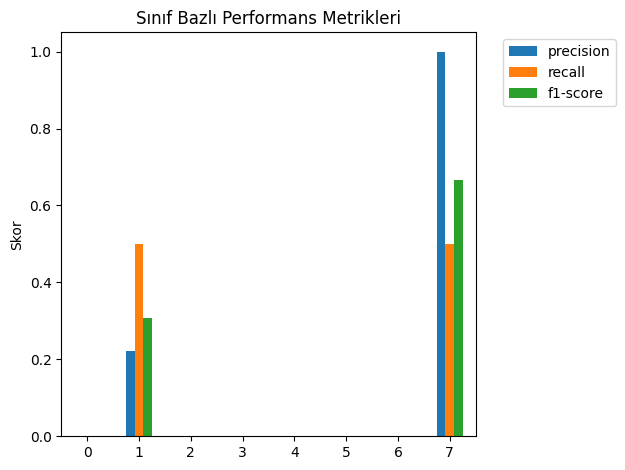

In [ ]:
# 0.20 SMOTE'suz Random Forest
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

df = pd.read_csv('DATA.csv')

X = df.drop(['GRADE', 'STUDENT ID'], axis=1, errors='ignore')
y = df['GRADE']

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.countplot(x=y, hue=y, palette='viridis', legend=False)
plt.title('Orijinal GRADE Dağılımı')
plt.xlabel('Notlar')
plt.ylabel('Öğrenci Sayısı')


X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.1,
                                                    random_state=42,
                                                    stratify=y)

model = RandomForestClassifier(random_state=42,
                               n_estimators=55,
                               max_depth=10)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(y.unique()),
            yticklabels=sorted(y.unique()))
plt.title('Karmaşıklık Matrisi')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek Değer')
plt.show()

feature_imp = pd.Series(model.feature_importances_, index=X.columns)
feature_imp.nlargest(10).plot(kind='barh', figsize=(10, 6))
plt.title('Top 10 Önemli Özellik')
plt.show()

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))

print("Detaylı Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred, zero_division=0))

report = classification_report(y_test, y_pred, output_dict=True)
metrics_df = pd.DataFrame(report).transpose().drop(['accuracy', 'macro avg', 'weighted avg'], errors='ignore')

metrics_df[['precision', 'recall', 'f1-score']].plot(kind='bar')
plt.title('Sınıf Bazlı Performans Metrikleri')
plt.ylabel('Skor')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


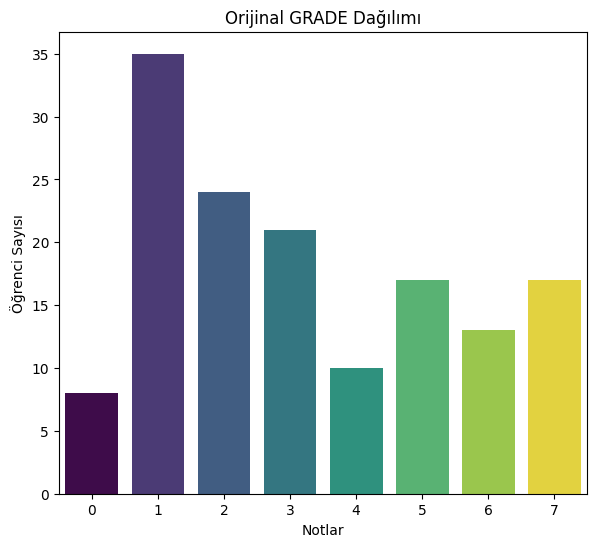

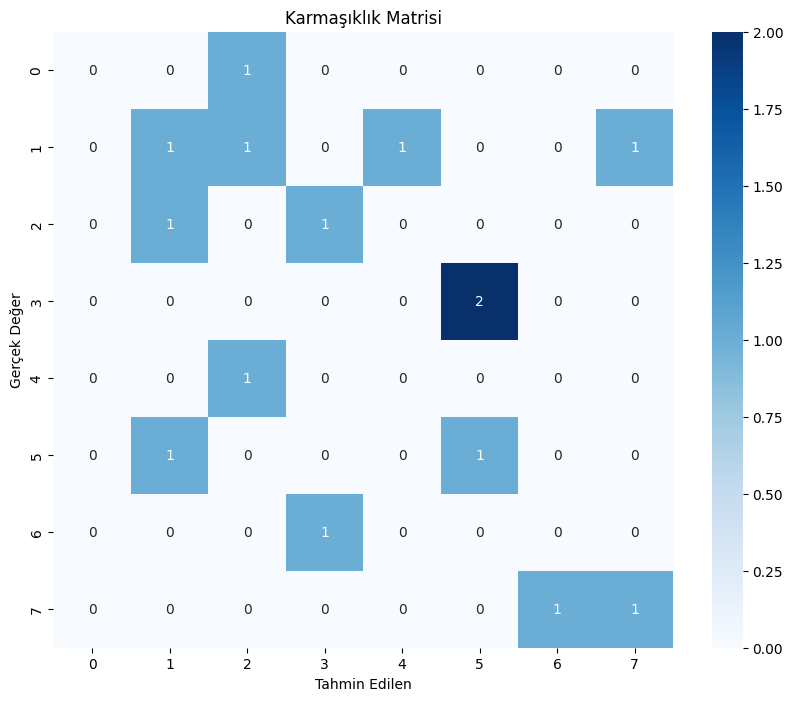

Accuracy: 0.2
Precision (macro): 0.14583333333333331
Recall (macro): 0.15625
F1 Score (macro): 0.14821428571428572
Detaylı Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.33      0.25      0.29         4
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           5       0.33      0.50      0.40         2
           6       0.00      0.00      0.00         1
           7       0.50      0.50      0.50         2

    accuracy                           0.20        15
   macro avg       0.15      0.16      0.15        15
weighted avg       0.20      0.20      0.20        15



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

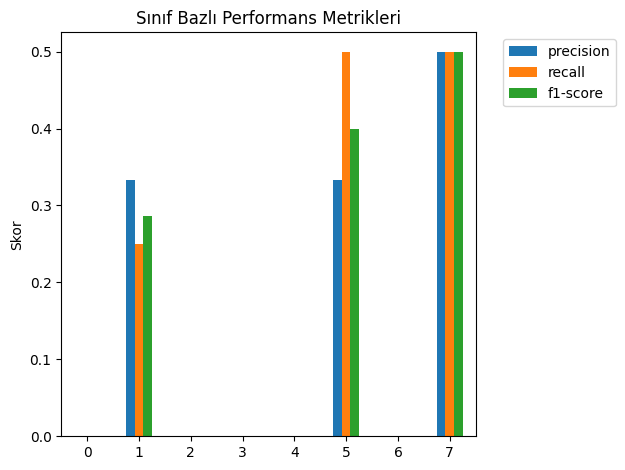

In [ ]:
# 0.20 SMOTE'suz Lojistik Regresyon
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

df = pd.read_csv('DATA.csv')

X = df.drop(['GRADE', 'STUDENT ID'], axis=1, errors='ignore')
y = df['GRADE']

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.countplot(x=y, hue=y, palette='viridis', legend=False)
plt.title('Orijinal GRADE Dağılımı')
plt.xlabel('Notlar')
plt.ylabel('Öğrenci Sayısı')

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.1,
                                                    random_state=42,
                                                    stratify=y)

model = LogisticRegression(max_iter=1000,
                           solver='lbfgs',
                           multi_class='multinomial',
                           random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(y.unique()),
            yticklabels=sorted(y.unique()))
plt.title('Karmaşıklık Matrisi')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek Değer')
plt.show()


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))

#Detaylı Rapor
print("Detaylı Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred, zero_division=0))

#Sınıf Bazlı Performans Grafiği
report = classification_report(y_test, y_pred, output_dict=True)
metrics_df = pd.DataFrame(report).transpose().drop(['accuracy', 'macro avg', 'weighted avg'], errors='ignore')

metrics_df[['precision', 'recall', 'f1-score']].plot(kind='bar')
plt.title('Sınıf Bazlı Performans Metrikleri')
plt.ylabel('Skor')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

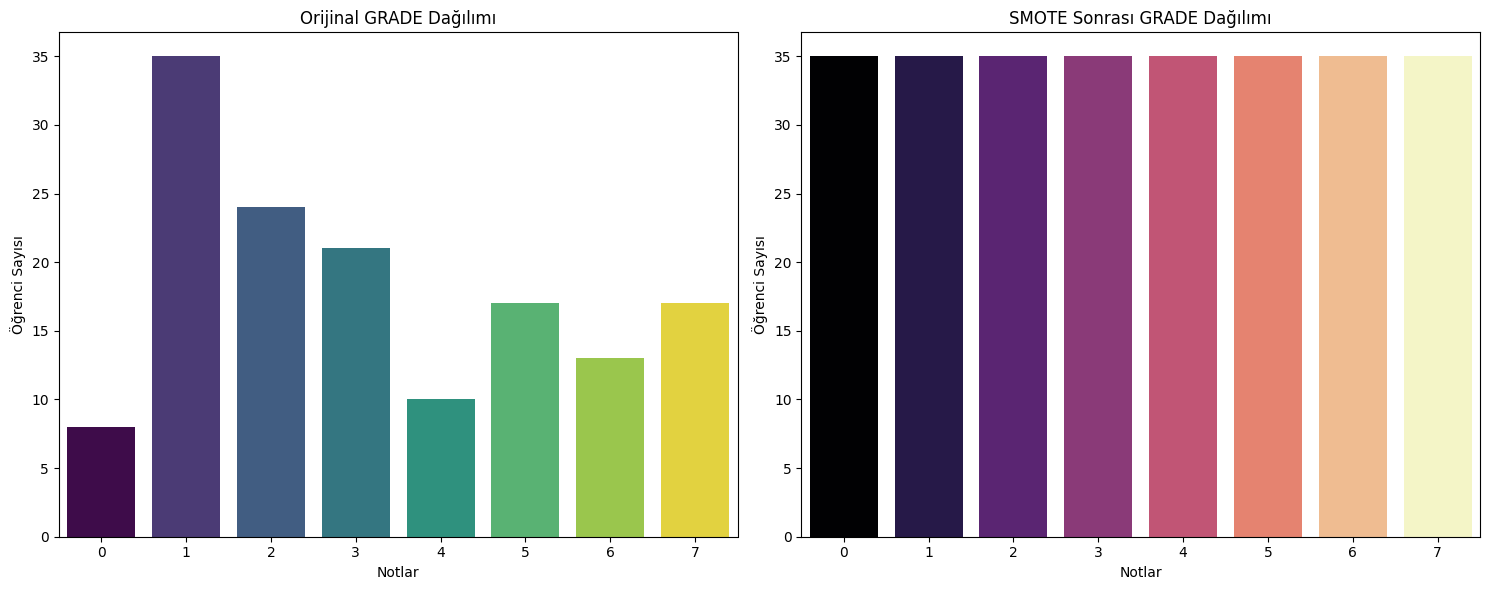

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


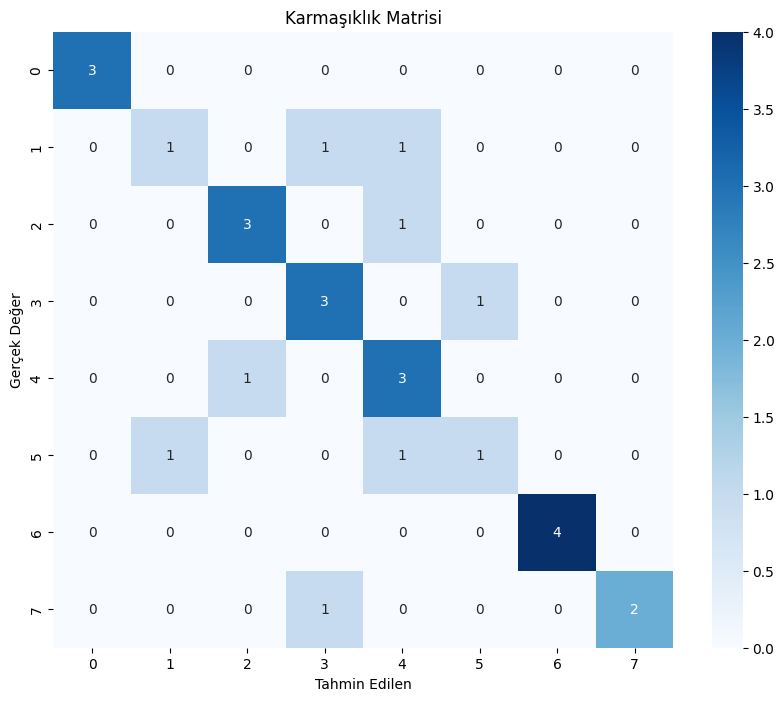

Bu modelde feature_importances_ özelliği bulunmuyor.
Accuracy: 0.7142857142857143
Precision (macro): 0.73125
Recall (macro): 0.6979166666666666
F1 Score (macro): 0.7020833333333333
Detaylı Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.50      0.33      0.40         3
           2       0.75      0.75      0.75         4
           3       0.60      0.75      0.67         4
           4       0.50      0.75      0.60         4
           5       0.50      0.33      0.40         3
           6       1.00      1.00      1.00         4
           7       1.00      0.67      0.80         3

    accuracy                           0.71        28
   macro avg       0.73      0.70      0.70        28
weighted avg       0.73      0.71      0.71        28



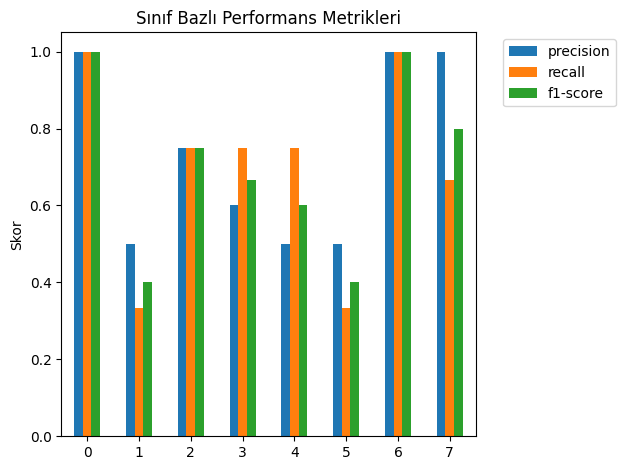

In [ ]:
# 0.7142 SMOTE ile Lojistik Regresyon
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

df = pd.read_csv('DATA.csv')

X = df.drop(['GRADE', 'STUDENT ID'], axis=1, errors='ignore')
y = df['GRADE']

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.countplot(x=y, hue=y, palette='viridis', legend=False)
plt.title('Orijinal GRADE Dağılımı')
plt.xlabel('Notlar')
plt.ylabel('Öğrenci Sayısı')

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

smote = SMOTE(random_state=42, k_neighbors=3)
X_resampled, y_resampled = smote.fit_resample(X_normalized, y)

# SMOTE sonrası dağılım
plt.subplot(1, 2, 2)
sns.countplot(x=y_resampled, hue=y_resampled, palette='magma', legend=False)
plt.title('SMOTE Sonrası GRADE Dağılımı')
plt.xlabel('Notlar')
plt.ylabel('Öğrenci Sayısı')
plt.tight_layout()
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,
                                                   test_size=0.1,
                                                   random_state=42,
                                                   stratify=y_resampled)

model = LogisticRegression(class_weight='balanced',
                           max_iter=1000,
                           solver='lbfgs',
                           multi_class='multinomial',
                           random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(y.unique()),
            yticklabels=sorted(y.unique()))
plt.title('Karmaşıklık Matrisi')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek Değer')
plt.show()

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))

#Detaylı Rapor
print("Detaylı Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred, zero_division=0))

#Sınıf Bazlı Performans Grafiği
report = classification_report(y_test, y_pred, output_dict=True)
metrics_df = pd.DataFrame(report).transpose().drop(['accuracy', 'macro avg', 'weighted avg'], errors='ignore')

metrics_df[['precision', 'recall', 'f1-score']].plot(kind='bar')
plt.title('Sınıf Bazlı Performans Metrikleri')
plt.ylabel('Skor')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

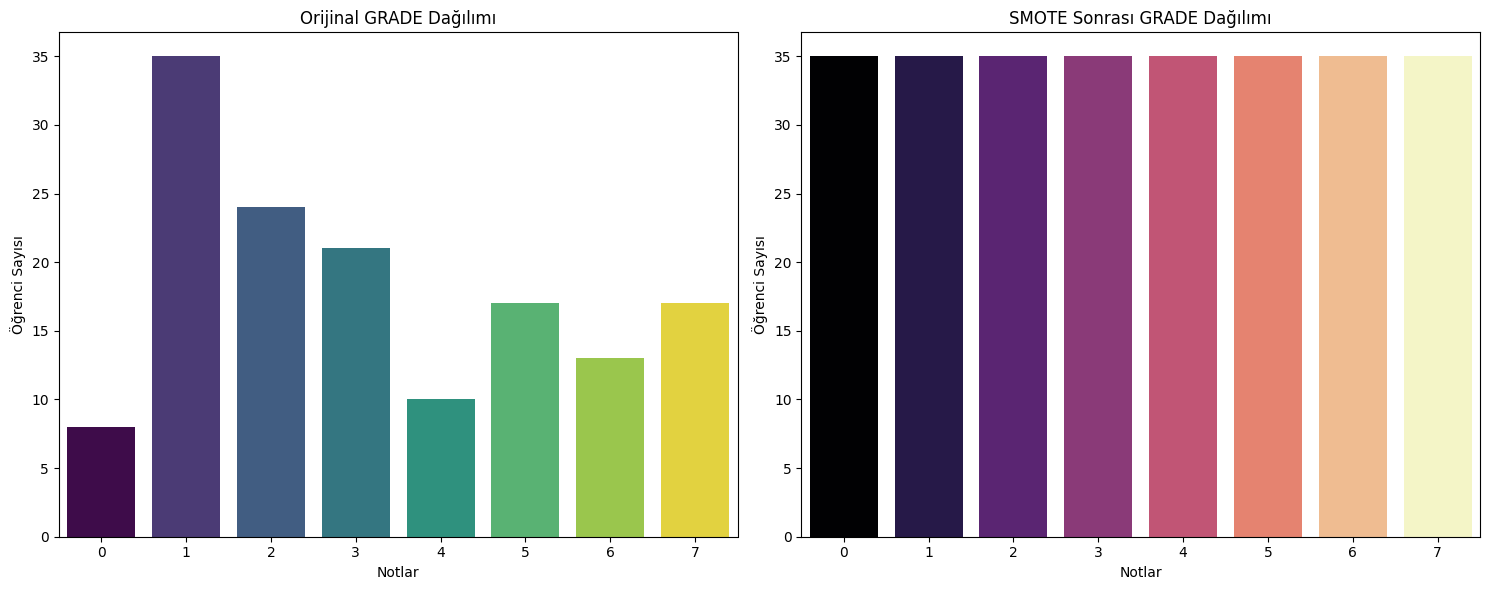

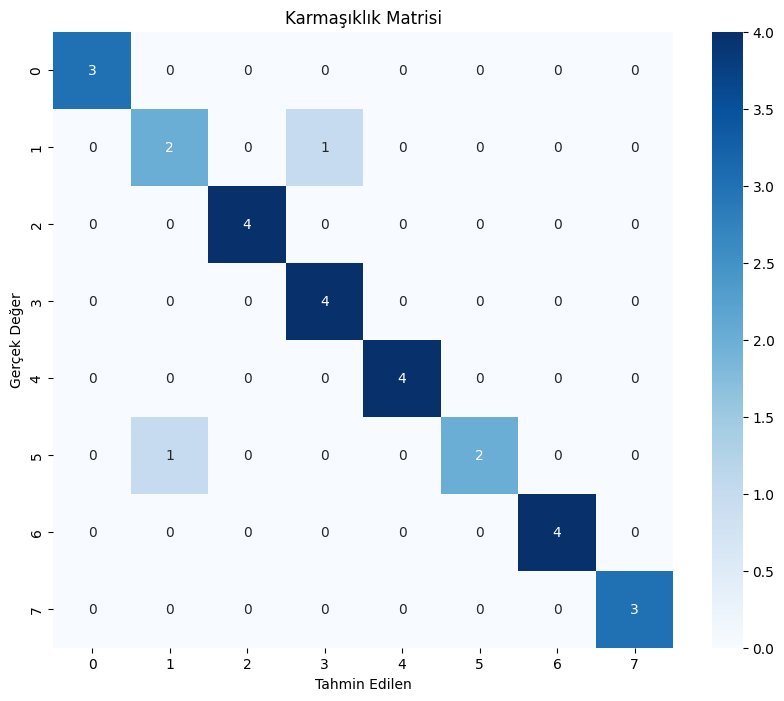

Accuracy: 0.9285714285714286
Precision (macro): 0.9333333333333333
Recall (macro): 0.9166666666666666
F1 Score (macro): 0.9194444444444444
Detaylı Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.67      0.67      0.67         3
           2       1.00      1.00      1.00         4
           3       0.80      1.00      0.89         4
           4       1.00      1.00      1.00         4
           5       1.00      0.67      0.80         3
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         3

    accuracy                           0.93        28
   macro avg       0.93      0.92      0.92        28
weighted avg       0.94      0.93      0.93        28



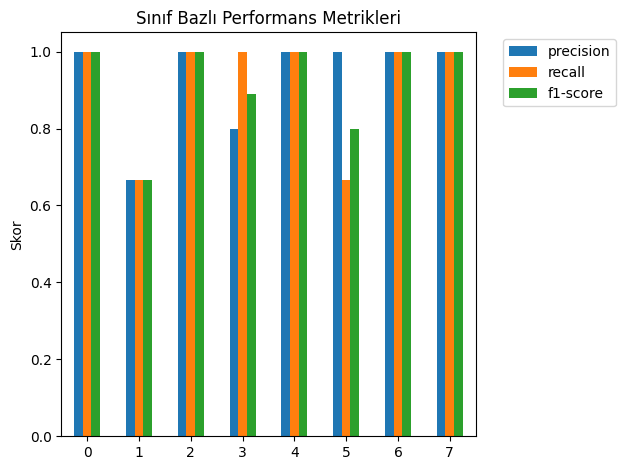

In [ ]:
# 0.92 SMOTE ile SVM
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

df = pd.read_csv('DATA.csv')

X = df.drop(['GRADE', 'STUDENT ID'], axis=1, errors='ignore')
y = df['GRADE']

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.countplot(x=y, hue=y, palette='viridis', legend=False)
plt.title('Orijinal GRADE Dağılımı')
plt.xlabel('Notlar')
plt.ylabel('Öğrenci Sayısı')

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# SMOTE ile dengeleme
smote = SMOTE(random_state=42, k_neighbors=3)
X_resampled, y_resampled = smote.fit_resample(X_normalized, y)

# SMOTE sonrası dağılım
plt.subplot(1, 2, 2)
sns.countplot(x=y_resampled, hue=y_resampled, palette='magma', legend=False)
plt.title('SMOTE Sonrası GRADE Dağılımı')
plt.xlabel('Notlar')
plt.ylabel('Öğrenci Sayısı')
plt.tight_layout()
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,
                                                   test_size=0.1,
                                                   random_state=42,
                                                   stratify=y_resampled)

model = SVC(class_weight='balanced',
            kernel='rbf',
            C=10,
            gamma='scale',
            probability=True,
            random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(y.unique()),
            yticklabels=sorted(y.unique()))
plt.title('Karmaşıklık Matrisi')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek Değer')
plt.show()

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))

#Detaylı Rapor
print("Detaylı Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred, zero_division=0))

#Sınıf Bazlı Performans Grafiği
report = classification_report(y_test, y_pred, output_dict=True)
metrics_df = pd.DataFrame(report).transpose().drop(['accuracy', 'macro avg', 'weighted avg'], errors='ignore')

metrics_df[['precision', 'recall', 'f1-score']].plot(kind='bar')
plt.title('Sınıf Bazlı Performans Metrikleri')
plt.ylabel('Skor')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


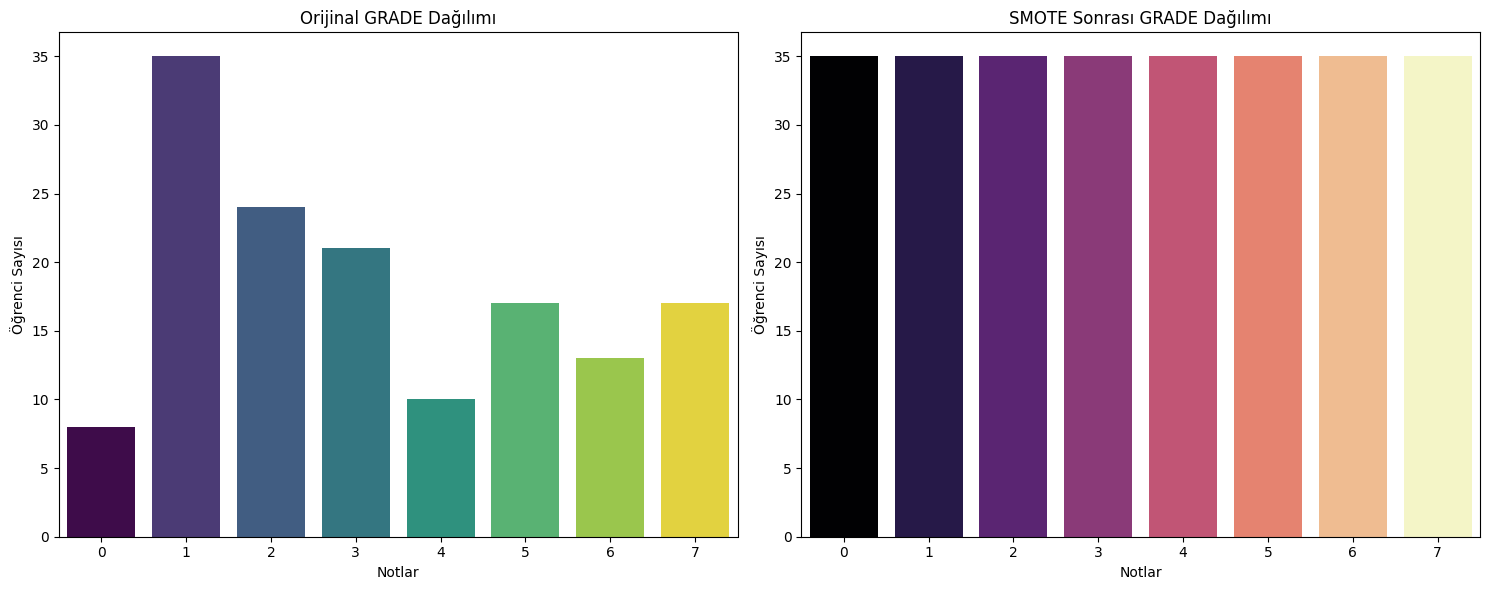

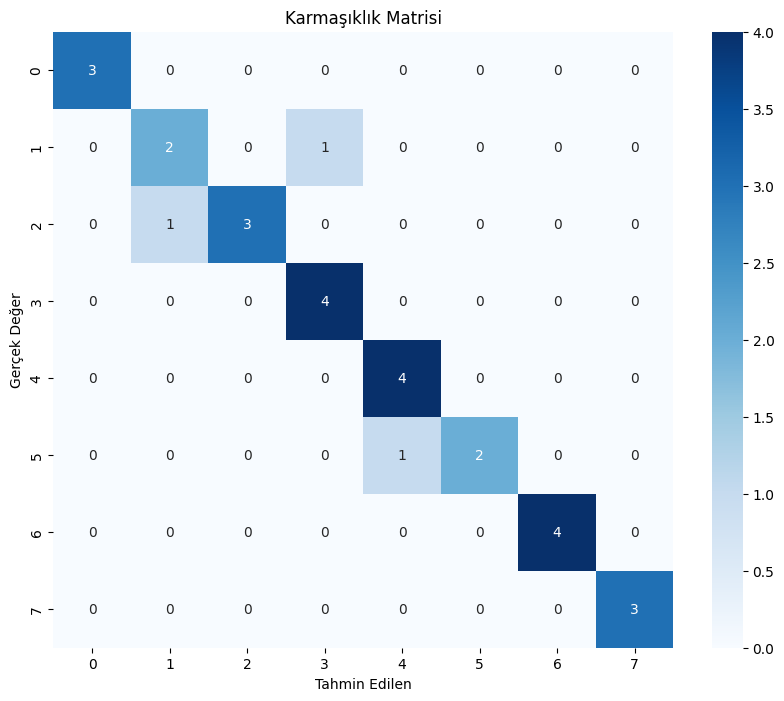

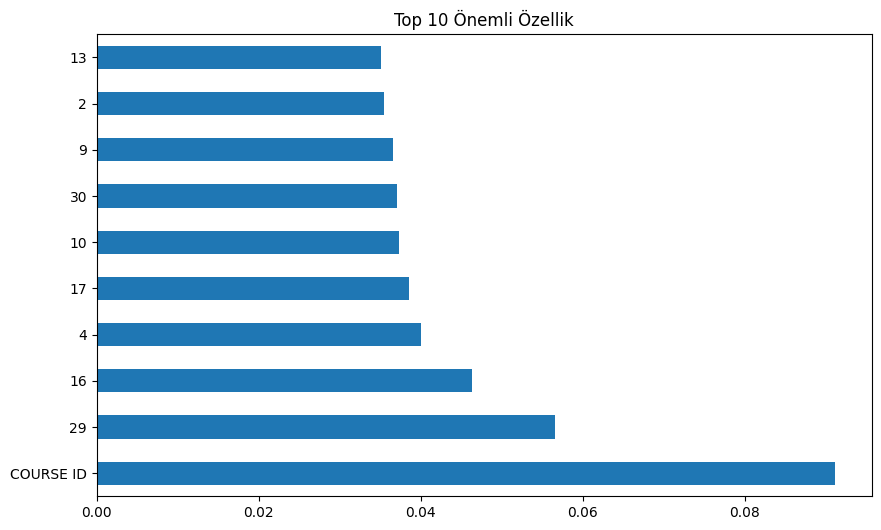

Accuracy: 0.8928571428571429
Precision (macro): 0.9083333333333333
Recall (macro): 0.8854166666666666
F1 Score (macro): 0.8876984126984127
Detaylı Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.67      0.67      0.67         3
           2       1.00      0.75      0.86         4
           3       0.80      1.00      0.89         4
           4       0.80      1.00      0.89         4
           5       1.00      0.67      0.80         3
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         3

    accuracy                           0.89        28
   macro avg       0.91      0.89      0.89        28
weighted avg       0.91      0.89      0.89        28



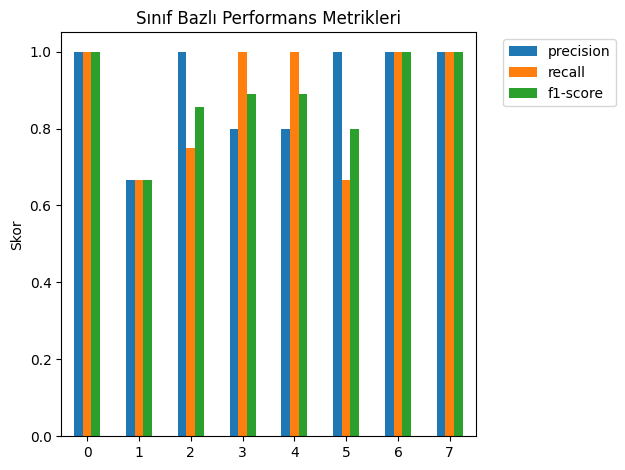

In [ ]:
# 0.8928 SMOTE ile Random Forest
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, \
    f1_score

df = pd.read_csv('DATA.csv')

X = df.drop(['GRADE', 'STUDENT ID'], axis=1, errors='ignore')
y = df['GRADE']

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.countplot(x=y, hue=y, palette='viridis', legend=False)
plt.title('Orijinal GRADE Dağılımı')
plt.xlabel('Notlar')
plt.ylabel('Öğrenci Sayısı')

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

smote = SMOTE(random_state=42, k_neighbors=3)
X_resampled, y_resampled = smote.fit_resample(X_normalized, y)

plt.subplot(1, 2, 2)
sns.countplot(x=y_resampled, hue=y_resampled, palette='magma', legend=False)
plt.title('SMOTE Sonrası GRADE Dağılımı')
plt.xlabel('Notlar')
plt.ylabel('Öğrenci Sayısı')
plt.tight_layout()
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,
                                                   test_size=0.1,
                                                   random_state=42,
                                                   stratify=y_resampled)

model = RandomForestClassifier(class_weight='balanced',
                              random_state=42,
                              n_estimators=55,
                              max_depth=10)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(y.unique()),
            yticklabels=sorted(y.unique()))
plt.title('Karmaşıklık Matrisi')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek Değer')
plt.show()

#Özellik Önem Sıralaması
feature_imp = pd.Series(model.feature_importances_,
                        index=df.drop(['GRADE', 'STUDENT ID'],
                                     axis=1,
                                     errors='ignore').columns)
feature_imp.nlargest(10).plot(kind='barh', figsize=(10, 6))
plt.title('Top 10 Önemli Özellik')
plt.show()

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))
#Detaylı Rapor
print("Detaylı Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred, zero_division=0))

#Sınıf Bazlı Performans Grafiği
report = classification_report(y_test, y_pred, output_dict=True)
metrics_df = pd.DataFrame(report).transpose().drop(['accuracy', 'macro avg', 'weighted avg'], errors='ignore')

metrics_df[['precision', 'recall', 'f1-score']].plot(kind='bar')
plt.title('Sınıf Bazlı Performans Metrikleri')
plt.ylabel('Skor')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

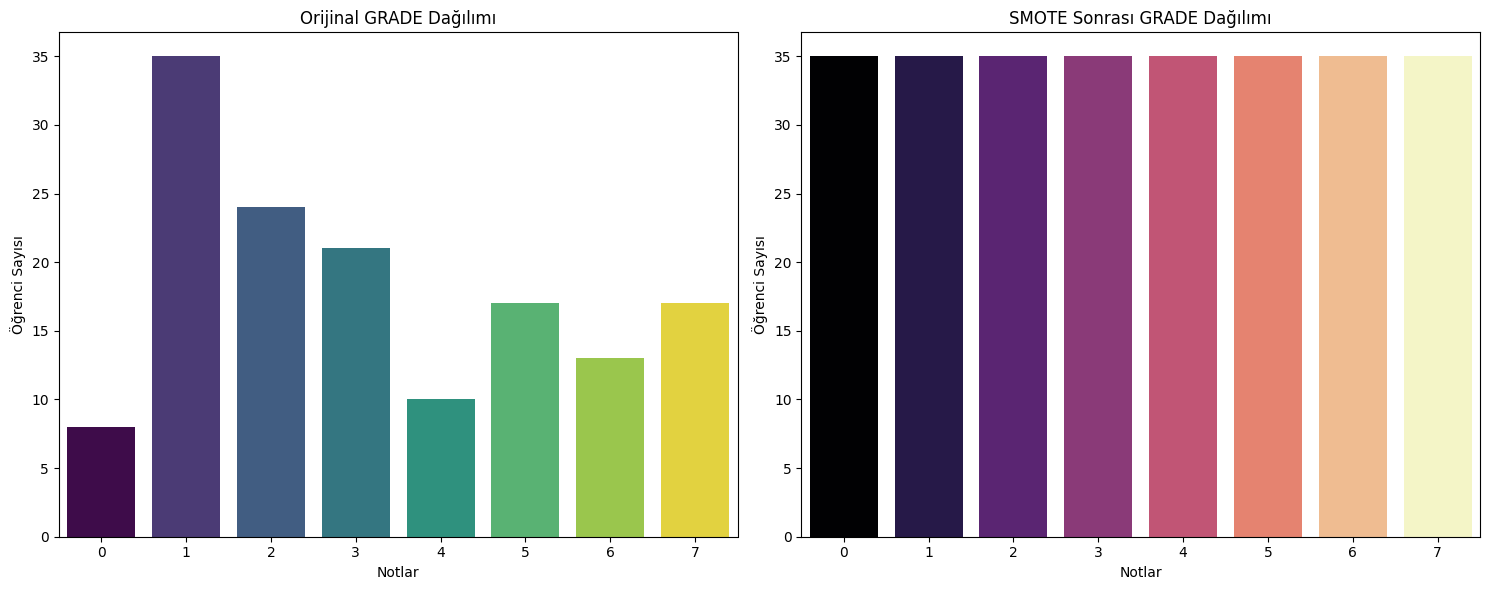

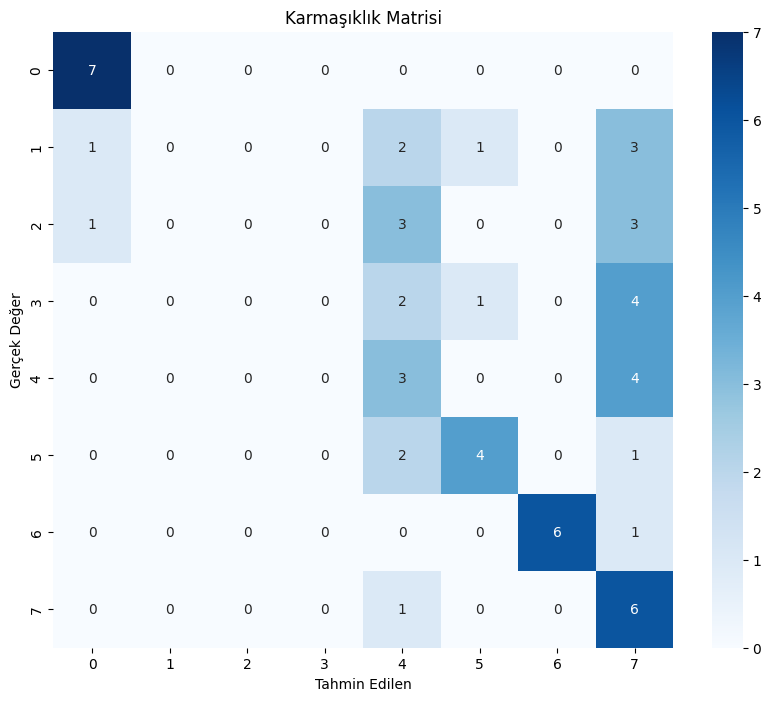

Accuracy: 0.4642857142857143
Precision (macro): 0.3684926184926185
Recall (macro): 0.4642857142857143
F1 Score (macro): 0.3909068302387268
Detaylı Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88         7
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00         7
           4       0.23      0.43      0.30         7
           5       0.67      0.57      0.62         7
           6       1.00      0.86      0.92         7
           7       0.27      0.86      0.41         7

    accuracy                           0.46        56
   macro avg       0.37      0.46      0.39        56
weighted avg       0.37      0.46      0.39        56



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

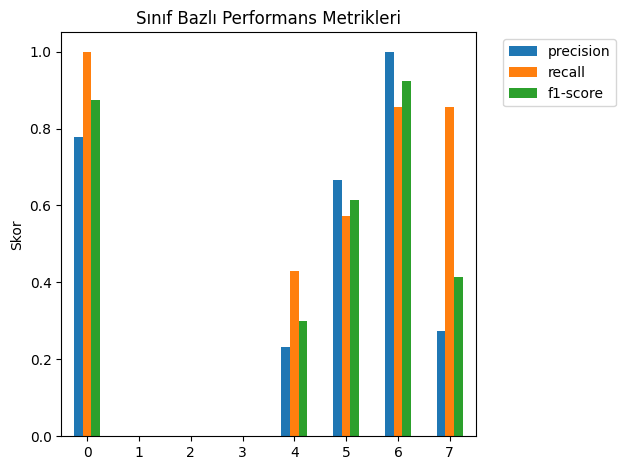

In [ ]:
# 0.4642 SMOTE ile Naive Bayes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, \
    f1_score

df = pd.read_csv('DATA.csv')

X = df.drop(['GRADE', 'STUDENT ID'], axis=1, errors='ignore')
y = df['GRADE']

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.countplot(x=y, hue=y, palette='viridis', legend=False)
plt.title('Orijinal GRADE Dağılımı')
plt.xlabel('Notlar')
plt.ylabel('Öğrenci Sayısı')

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# SMOTE ile dengeleme
smote = SMOTE(random_state=42, k_neighbors=3)
X_resampled, y_resampled = smote.fit_resample(X_normalized, y)

# SMOTE sonrası dağılım (düzeltilmiş)
plt.subplot(1, 2, 2)
sns.countplot(x=y_resampled, hue=y_resampled, palette='magma', legend=False)
plt.title('SMOTE Sonrası GRADE Dağılımı')
plt.xlabel('Notlar')
plt.ylabel('Öğrenci Sayısı')
plt.tight_layout()
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,
                                                   test_size=0.2,
                                                   random_state=42,
                                                   stratify=y_resampled)

model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(y.unique()),
            yticklabels=sorted(y.unique()))
plt.title('Karmaşıklık Matrisi')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek Değer')
plt.show()

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))
#Detaylı Rapor
print("Detaylı Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred, zero_division=0))

#Sınıf Bazlı Performans Grafiği
report = classification_report(y_test, y_pred, output_dict=True)
metrics_df = pd.DataFrame(report).transpose().drop(['accuracy', 'macro avg', 'weighted avg'], errors='ignore')

metrics_df[['precision', 'recall', 'f1-score']].plot(kind='bar')
plt.title('Sınıf Bazlı Performans Metrikleri')
plt.ylabel('Skor')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

En iyi k değeri: 1, Doğruluk: 0.74
Accuracy: 0.39285714285714285
Precision (macro): 0.43054653679653676
Recall (macro): 0.3943181818181818
F1 Score (macro): 0.34332757296466976

KNN Performansı:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        10
           1       0.50      0.20      0.29        10
           2       0.89      0.73      0.80        11
           3       0.56      0.45      0.50        11
           4       0.92      1.00      0.96        11
           5       0.62      0.80      0.70        10
           6       0.67      0.73      0.70        11
           7       0.83      1.00      0.91        10

    accuracy                           0.74        84
   macro avg       0.72      0.74      0.71        84
weighted avg       0.72      0.74      0.72        84



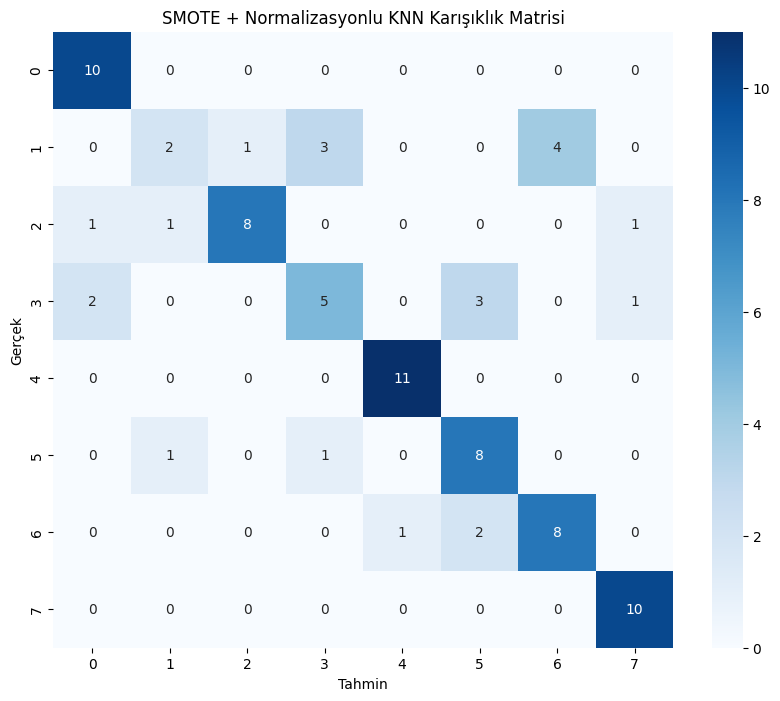

In [2]:
# 0.73 SMOTE İLE KNN
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

df = pd.read_csv("DATA.csv")
df.dropna(inplace=True)

y = df["GRADE"]
x = df.drop(["GRADE", "STUDENT ID"], axis=1)

scaler = StandardScaler()
x_normalized = scaler.fit_transform(x)

#SMOTE ile örnekleme
smote = SMOTE(random_state=42, k_neighbors=3)
x_resampled, y_resampled = smote.fit_resample(x_normalized, y)

x_train, x_test, y_train, y_test = train_test_split(
    x_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled
)

#En iyi k değerini bulma
max_accuracy = 0
best_k = 1
for k in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    acc = accuracy_score(y_test, y_pred)

    if acc > max_accuracy:
        max_accuracy = acc
        best_k = k

print(f"En iyi k değeri: {best_k}, Doğruluk: {max_accuracy:.2f}")

knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(x_train, y_train)
y_pred_knn = knn_model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))

print("\nKNN Performansı:")
print(classification_report(y_test, y_pred_knn, zero_division=0))

cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=sorted(y.unique()),
            yticklabels=sorted(y.unique()))
plt.title("SMOTE + Normalizasyonlu KNN Karışıklık Matrisi")
plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.show()